## Human Activity Recognization

This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.
<br>Thus this is 6 classs classification problem

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import itertools

In [3]:
path = "C:\\Users\\shaur\\Downloads\\HumanActivityRecognition\\UCI_HAR_Dataset\\csv_files\\train.csv"

df = pd.read_csv(path)
df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


This datset contains raw data converted into time sere sdata by various SIGNAL PROCESS TECHNIQUE and also many other feature engg. columns

In [8]:
df.shape

(7352, 564)

In [9]:
df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [11]:
# This shows dataset is balanced
df.ActivityName.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: ActivityName, dtype: int64

### Data Cleaning

In [14]:
# Checking or any null values - 

df[df.isnull().any(1)]
#df.isnull().values.sum()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName


In [18]:
# Checking Duplicates
print('No of duplicates in train: {}'.format(sum(df.duplicated())))

No of duplicates in train: 0


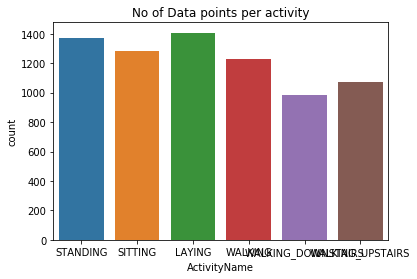

In [23]:
# Checking the Count of the ActivityName

plt.title("No of Data points per activity")
sns.countplot(x=df.ActivityName)
plt.show()

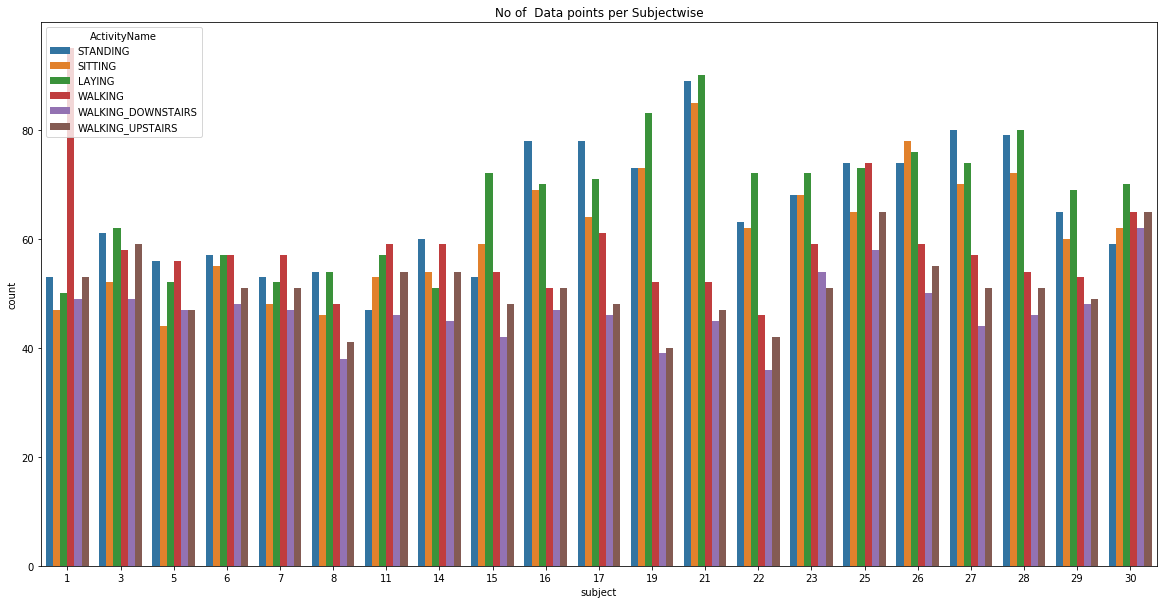

In [27]:
# Checking the data balancing a/c to Subject

plt.figure(figsize=(20,10))
plt.title("No of  Data points per Subjectwise")
sns.countplot(x='subject', hue='ActivityName', data=df)
plt.show()


### Applying t-SNE on data

t-SNE gives us summary of the dataset wether it can be classified into 6 categories or not

In [46]:
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix

In [29]:
X_pre_tsne = df.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = df['ActivityName']

In [30]:
X_pre_tsne.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [32]:
perplexity = 15 
iteration  = 1000
print("performing t-sne with perplexity = {} and iterations = {} ".format(perplexity , iteration))
x_reduced = TSNE(n_components=2 ,
                perplexity=perplexity,
                n_iter=iteration,
                verbose=2,
                n_jobs=-1)

x_reduced = x_reduced.fit_transform(X_pre_tsne)

performing t-sne with perplexity = 15 and iterations = 1000 
[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 7352 samples in 2.298s...
[t-SNE] Computed neighbors for 7352 samples in 13.661s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.218608
[t-SNE] Computed conditional probabilities in 0.349s
[t-SNE] Iteration 50: error = 100.9403000, gradient norm = 0.0171595 (50 iterations in 5.806s)
[t-SNE] Iteration 100: error = 86.3070602, gradient norm = 0.0076975 (50 iterations in 4.196

Creating plot for this t-sne visualization..


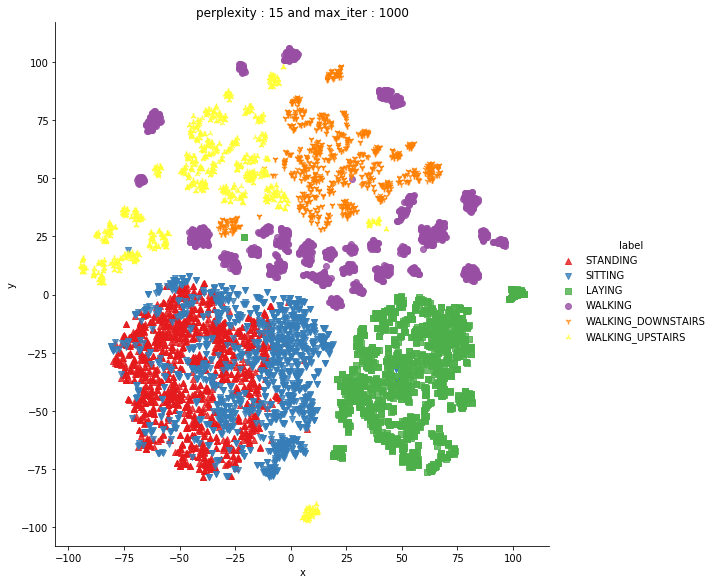

Done


In [37]:
# prepare the data for seaborn         
print('Creating plot for this t-sne visualization..')

df = pd.DataFrame({'x':x_reduced[:,0], 'y':x_reduced[:,1] ,'label':y_pre_tsne})
        
# draw the plot in appropriate place in the grid
sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
palette="Set1",markers=['^','v','s','o', '1','2'])
plt.title("perplexity : {} and max_iter : {}".format(perplexity, iteration))
plt.show()
print('Done')                                                                                                                                                                                                                        

This shows that labels can be easily classified, but tight situation can be seen between
SITTING and STANDING class

In [3]:
train = pd.read_csv("C:\\Users\\shaur\\Downloads\\HumanActivityRecognition\\UCI_HAR_Dataset\\csv_files\\train.csv")
test  = pd.read_csv("C:\\Users\\shaur\\Downloads\\HumanActivityRecognition\\UCI_HAR_Dataset\\csv_files\\test.csv")

print(train.shape) 
print(test.shape)

(7352, 564)
(2947, 564)


In [4]:
train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

In [5]:
x_train = train.drop(labels=['subject','Activity','ActivityName'], axis=1)
x_train.shape

(7352, 561)

In [6]:
y_train = train.ActivityName
y_train.shape

(7352,)

In [7]:
x_test = test.drop(labels=['subject','Activity','ActivityName'], axis=1)
y_test = test.ActivityName

In [8]:
class_labels = list(y_train.unique())
class_labels

['STANDING',
 'SITTING',
 'LAYING',
 'WALKING',
 'WALKING_DOWNSTAIRS',
 'WALKING_UPSTAIRS']

In [9]:
# functioj for plotting CONFUSION MATRXI

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
from datetime import datetime

#### Generic function to run any model

In [11]:
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Greens):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

### 1. logistic Regression (with GRID search)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.calibration import CalibratedClassifierCV

training the model..
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   25.1s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:31.276138


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.010998


---------------------
|      Accuracy      |
---------------------

    0.9582626399728538


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 429  59   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  23   1 447]]


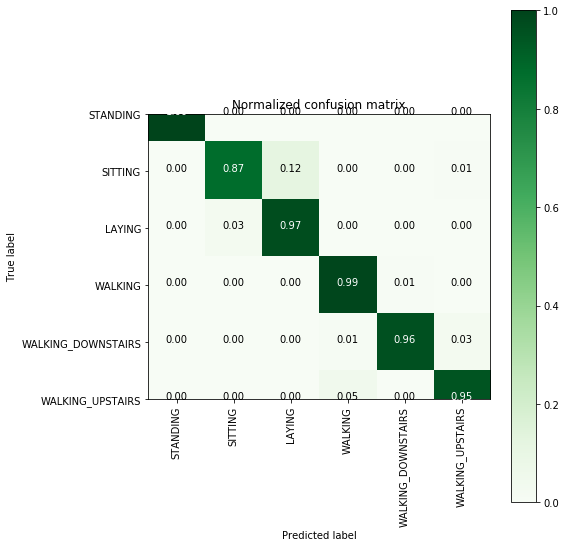

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [12]:
# Declaring parameters for grib search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}

lr_model = LogisticRegression()
lr_model_grid = GridSearchCV(estimator=lr_model,
                            param_grid=parameters,
                            n_jobs=-1,
                            verbose=1)
lr_model_grid_result = perform_model(lr_model_grid,x_train,y_train,x_test,y_test,class_labels)


In [15]:
type(lr_model_grid_result)

dict

In [17]:
lr_model_grid_result.keys()

dict_keys(['training_time', 'testing_time', 'predicted', 'accuracy', 'confusion_matrix', 'classification_report', 'model'])

In [22]:
print(lr_model_grid_result['classification_report'])

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.87      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.95      0.96       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [25]:
lr_model_grid_result['model'].best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

This shows model with C=1 and penalty='l2' works best

In [40]:
model = LogisticRegression(penalty='l2',C=1,n_jobs=-1)
model = model.fit(x_train,y_train)
# model = CalibratedClassifierCV(base_estimator=model , method='sigmoid')
# model = model.fit(x_train, y_train)
# using Calibration accuracy was accuracy = 0.9280624363759755

In [41]:
y_pred = model.predict(x_test)
accuracy = metrics.accuracy_score(y_true=y_test , y_pred=y_pred)
accuracy

0.9582626399728538

In [42]:
np.array(model.coef_).shape

(6, 561)

### 2. Linear SVM

In [11]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

training the model..
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   50.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.3min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:01:28.511573


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.024099


---------------------
|      Accuracy      |
---------------------

    0.9664065151001018


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  2 428  58   0   0   3]
 [  0  10 521   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   3 412   5]
 [  0   0   0  17   0 454]]


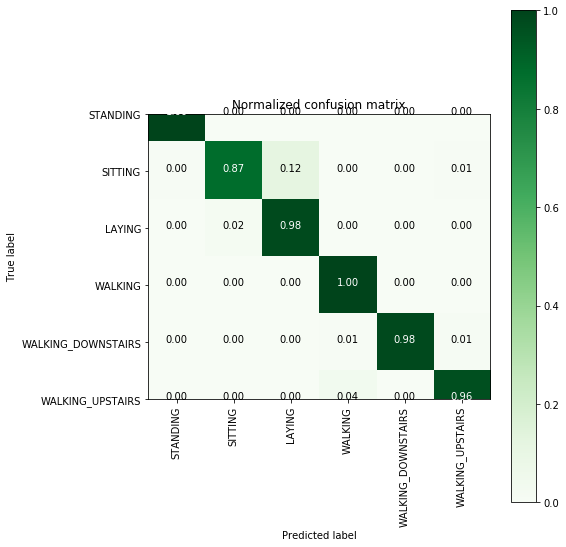

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.87      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [15]:
parameters = {"C":[0.125, 0.5, 1, 2, 8, 16], 'penalty':['l1','l2']}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(estimator=lr_svc,
                          param_grid=parameters,
                          n_jobs=-1,
                          verbose=1)

lr_svc_result = perform_model(lr_svc_grid,x_train,y_train,x_test,y_test,class_labels)

In [18]:
lr_svc_result.keys()

dict_keys(['training_time', 'testing_time', 'predicted', 'accuracy', 'confusion_matrix', 'classification_report', 'model'])

In [16]:
lr_svc_result['model'].best_estimator_

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

In [19]:
lr_svc_result['accuracy']

0.9664065151001018

### 3. Kernal SVM (using RBF kernal)

In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

training the model..
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 30.0min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:30:04.168298


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:02.248986


---------------------
|      Accuracy      |
---------------------

    0.9626739056667798


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]


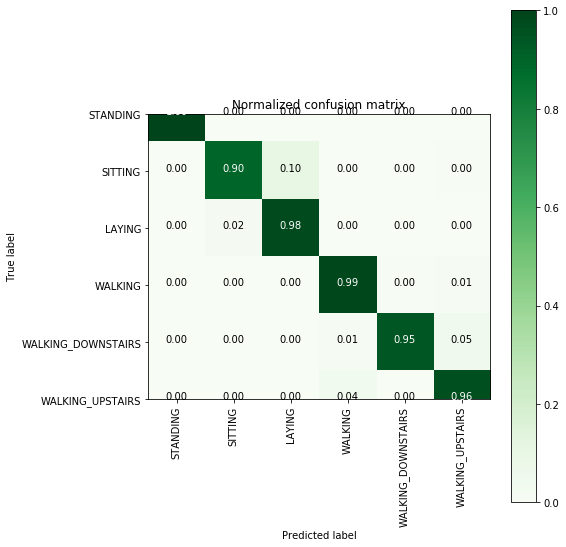

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [22]:
# RBF SVM kernal has 2 hyperparameter ('C' bias variance trade off constant, and 
#                                      'gamma'=1/sigma influence radius)

parameters = {'C':[0.125, 0.5, 1, 2, 8, 16],
             'gamma':[0.0078125, 0.125, 2],
             'tol':[0.00005, 0.001]}

kernal_svc = SVC(kernel='rbf')

kernal_svc_grid = GridSearchCV(estimator=kernal_svc,
                              param_grid=parameters,
                              n_jobs=-1,
                              verbose=1)

kernal_svc_result = perform_model(kernal_svc_grid, x_train, y_train, x_test, y_test, class_labels)

In [23]:
kernal_svc_result['model'].best_estimator_

SVC(C=16, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0078125, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=5e-05, verbose=False)

In [24]:
kernal_svc_result['accuracy']

0.9626739056667798

### 4. Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

training the model..
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.6s finished


Done 
 

training_time(HH:MM:SS.ms) - 0:00:11.067795


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.006984


---------------------
|      Accuracy      |
---------------------

    0.8727519511367492


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 375 116   0   0   0]
 [  0  59 473   0   0   0]
 [  0   0   0 469  18   9]
 [  0   0   0  16 348  56]
 [  0   0   0  72  29 370]]


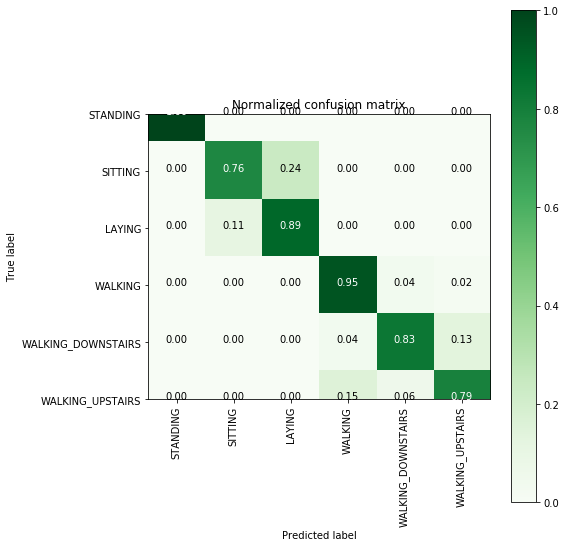

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.76      0.81       491
          STANDING       0.80      0.89      0.84       532
           WALKING       0.84      0.95      0.89       496
WALKING_DOWNSTAIRS       0.88      0.83      0.85       420
  WALKING_UPSTAIRS       0.85      0.79      0.82       471

          accuracy                           0.87      2947
         macro avg       0.87      0.87      0.87      2947
      weighted avg       0.87      0.87      0.87      2947



In [14]:
parameter = {'max_depth':[4,6,8,10]}

dt_model = DecisionTreeClassifier(criterion='gini')
dt_grid = GridSearchCV(estimator=dt_model,
                       param_grid=parameter,
                       n_jobs=-1,
                      verbose=1)

dt_result = perform_model(dt_grid, x_train,y_train,x_test,y_test,class_labels)

In [15]:
dt_result.keys()

dict_keys(['training_time', 'testing_time', 'predicted', 'accuracy', 'confusion_matrix', 'classification_report', 'model'])

In [16]:
dt_result['model'].best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
dt_result["model"].best_params_

{'max_depth': 8}

In [18]:
dt_result["accuracy"]

0.8727519511367492

### 5. Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

training the model..
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.0min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:05:08.727912


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.048870


---------------------
|      Accuracy      |
---------------------

    0.9246691550729556


--------------------
| Confusion Matrix |
--------------------

 [[537   0   0   0   0   0]
 [  0 436  55   0   0   0]
 [  0  40 492   0   0   0]
 [  0   0   0 480   5  11]
 [  0   0   0  19 355  46]
 [  0   0   0  40   6 425]]


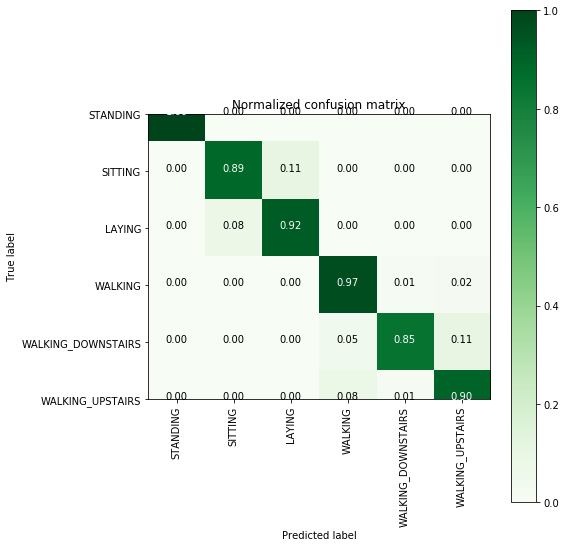

-------------------------
| Classifiction Report |
-------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.89      0.90       491
          STANDING       0.90      0.92      0.91       532
           WALKING       0.89      0.97      0.93       496
WALKING_DOWNSTAIRS       0.97      0.85      0.90       420
  WALKING_UPSTAIRS       0.88      0.90      0.89       471

          accuracy                           0.92      2947
         macro avg       0.93      0.92      0.92      2947
      weighted avg       0.93      0.92      0.92      2947



In [21]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}

rf_model = RandomForestClassifier()

rf_grid = GridSearchCV(estimator=rf_model,
                      param_grid=params,
                      verbose=1,
                      n_jobs=-1)

rf_result = perform_model(rf_grid, x_train,y_train,x_test,y_test, class_labels)

In [23]:
rf_result['model'].best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=110,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
rf_result['model'].best_params_

{'max_depth': 13, 'n_estimators': 110}

In [25]:
rf_result['accuracy']

0.9246691550729556

### 6. GBDT

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [ ]:
parameter = {'learning_rate':[0.1, 0.01] ,
            'n_estimators':np.arange(100,170,10),
            'max_depth': np.arange(5,8,1)}

gbdt_model = GradientBoostingClassifier()

gbdt_grid = GridSearchCV(estimator=gbdt_model,
                        verbose=1,
                        n_jobs=-1,
                        param_grid=parameter)

gbdt_result = perform_model(gbdt_grid, x_train, y_train, x_test, y_test, class_labels)

training the model..
Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 72.6min
